# Content
This is a dataset of over 50 Cryptocurrencies' historical OHLC (Open High Low Close) data. The date range is from May 2013 to October 2022 on a daily basis. The prices are represented in USD or $. The file format is CSV which is tabular and faster to load.

The data was scraped and cleaned from the Coin Market Cap website using automated scripts.

# Cryptocurrency Prices Data

## Basic library for analysis

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data set

In [83]:
df = pd.read_csv("crypto.csv")

In [84]:
# dimensions of dataset
df.shape

(72946, 10)

In [85]:
df.head(5)

,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [86]:
#columns name
df.columns

Index(['Unnamed: 0', 'open', 'high', 'low', 'close', 'volume', 'marketCap',
       'timestamp', 'crypto_name', 'date'],
      dtype='object')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   72946 non-null  int64  
 1   open         72946 non-null  float64
 2   high         72946 non-null  float64
 3   low          72946 non-null  float64
 4   close        72946 non-null  float64
 5   volume       72946 non-null  float64
 6   marketCap    72946 non-null  float64
 7   timestamp    72946 non-null  object 
 8   crypto_name  72946 non-null  object 
 9   date         72946 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.6+ MB


## check messing value and 

In [87]:
df.isnull().sum()

Unnamed: 0     0
open           0
high           0
low            0
close          0
volume         0
marketCap      0
timestamp      0
crypto_name    0
date           0
dtype: int64

In [88]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [89]:
df.tail(5)

,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
72941,0.022604,0.022988,0.022197,0.022796,4.040134e+07,1.652957e+09,2022-10-23T23:59:59.999Z,VeChain,2022-10-23
72942,1.468244,1.530464,1.435415,1.517878,2.844351e+07,1.572825e+09,2022-10-23T23:59:59.999Z,Flow,2022-10-23
72943,4.950431,5.148565,4.945280,5.117206,1.069497e+08,1.559551e+09,2022-10-23T23:59:59.999Z,Filecoin,2022-10-23
72944,0.000233,0.000243,0.000226,0.000239,2.143268e+08,1.576291e+09,2022-10-23T23:59:59.999Z,Terra Classic,2022-10-23
72945,0.465490,0.471006,0.453438,0.469033,9.509743e+08,2.339868e+10,2022-10-23T23:59:59.999Z,XRP,2022-10-23


In [90]:
# convert the date column to datetime format
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["date"] = pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   open         72946 non-null  float64            
 1   high         72946 non-null  float64            
 2   low          72946 non-null  float64            
 3   close        72946 non-null  float64            
 4   volume       72946 non-null  float64            
 5   marketCap    72946 non-null  float64            
 6   timestamp    72946 non-null  datetime64[ns, UTC]
 7   crypto_name  72946 non-null  object             
 8   date         72946 non-null  datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(6), object(1)
memory usage: 5.0+ MB


In [91]:
cols_to_convert = ['open', 'high', 'low', 'close', 'volume', 'marketCap']
dtypes_dict = {col: 'float32'
              for col in cols_to_convert}
df = df.astype(dtypes_dict)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   open         72946 non-null  float32            
 1   high         72946 non-null  float32            
 2   low          72946 non-null  float32            
 3   close        72946 non-null  float32            
 4   volume       72946 non-null  float32            
 5   marketCap    72946 non-null  float32            
 6   timestamp    72946 non-null  datetime64[ns, UTC]
 7   crypto_name  72946 non-null  object             
 8   date         72946 non-null  datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float32(6), object(1)
memory usage: 3.3+ MB


In [93]:
df.shape

(72946, 9)

## perfrom basic statistics for each cryptocurrency

In [94]:
df_stats = df.groupby('crypto_name').agg({
    'open': ['mean', 'std', 'min', 'max'],
    'high': ['mean', 'std', 'min', 'max'],
    'low' : ['mean', 'std', 'min', 'max'],
    'close':['mean', 'std', 'min', 'max'],
    'volume':['mean', 'std', 'min', 'max'],
    'marketCap':['mean', 'std', 'min', 'max']
})

df_stats

open                                            \
                               mean           std           min           max   
crypto_name                                                                     
Aave                     237.987991    134.964697  0.000000e+00    629.231689   
Algorand                   0.696573      0.532378  1.263299e-01      3.278668   
ApeCoin                    8.533293      4.288075  1.000397e+00     20.019119   
Aptos                      8.939706           NaN  8.939706e+00      8.939706   
Avalanche                 38.369759     33.090505  2.905293e+00    134.865555   
BNB                      110.803215    175.517503  9.972120e-02    676.315918   
Basic Attention Token      0.378087      0.299441  7.168760e-02      1.769531   
Binance USD                1.000827      0.003252  9.700063e-01      1.049333   
Bitcoin                 9682.454102  15053.205555  6.850500e+01  67549.734375   
Bitcoin Cash             518.145813    450.818925  7.737090e+01   3909.000000   
Cardano                    0.447818      0.634215  1.841390e-02      2.966390   
Casper                     0.129382      0.120506  2.417369e-02      1.325972   
Chain                      0.090225      0.026625  4.707309e-02      0.172830   
Chainlink                  8.403423     10.710791  1.311100e-01     52.247688   
Chiliz                     0.130936      0.166900  4.132742e-03      0.771456   
Cosmos                    11.204780     10.546268  1.652300e+00     43.612854   
Cronos                     0.133696      0.137507  1.216433e-02      0.899181   
Dai                        1.003724      0.008392  9.645392e-01      1.094015   
Decentraland               0.433644      0.841030  8.857500e-03      5.161565   
Dogecoin                   0.028355      0.077816  8.715370e-05      0.687801   
EOS                        4.396224      2.980518  4.927900e-01     21.639099   
Elrond                   125.914436     94.499470  6.942788e+00    490.914520   
Ethereum                 681.081970   1057.567211  4.315890e-01   4810.071289   
Ethereum Classic          15.634020     17.055799  6.047370e-01    127.334953   
FTX Token                 20.044615     20.853679  8.312896e-01     79.528366   
Filecoin                  22.911823     31.603032  2.432368e+00    191.153915   
Flow                      14.917850      9.841780  1.268316e+00     39.109303   
Hedera                     0.132597      0.124116  1.005386e-02      0.505475   
Huobi Token                5.673184      4.894398  9.183217e-01     34.242722   
Internet Computer         43.919006     47.604759  0.000000e+00    428.484161   
Litecoin                  56.458405     66.574133  1.153240e+00    387.869171   
Maker                   1111.017578    986.541558  2.209870e+01   5982.138184   
Monero                    87.215660     97.039522  2.201210e-01    483.709991   
NEAR Protocol              5.954732      4.374100  5.342098e-01     20.181196   
OKB                       10.027883      8.334335  1.340595e+00     42.392735   
Polkadot                  20.633863     13.106543  2.787857e+00     53.877750   
Polygon                    0.492185      0.700525  3.143122e-03      2.876460   
Quant                     45.167294     76.008437  2.174760e-01    394.832947   
Ravencoin                  0.047642      0.044224  1.010233e-02      0.234745   
Shiba Inu                  0.000011      0.000015  8.287000e-11      0.000079   
Solana                    50.514996     65.287690  5.133905e-01    258.781555   
Stellar                    0.115512      0.143054  1.352300e-03      0.892399   
THORChain                  3.596384      4.488848  8.601991e-03     20.341566   
TRON                       0.040124      0.031121  1.419220e-03      0.224499   
Terra Classic             14.501492     25.695889  5.523741e-05    116.419167   
Tether                     1.000686      0.015207  5.712490e-01      1.210420   
Tezos                      2.438847      1.602539  3.459015e-0

## visualization the price trends of each cryptocurrency over time

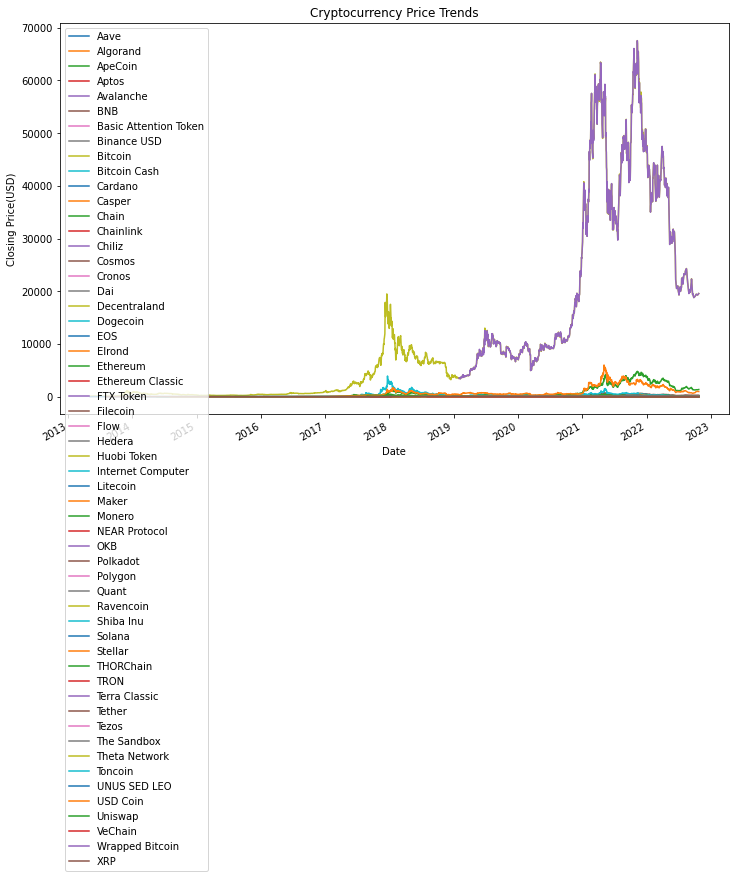

In [95]:
fig, ax = plt.subplots(figsize=(12, 8))

for name, group in df.groupby('crypto_name'):
    group.plot(x='timestamp', y = 'close', label= name, ax = ax)
plt.xlabel('Date') 
plt.ylabel("Closing Price(USD)")
plt.title("Cryptocurrency Price Trends")
plt.legend(loc = 'best')
plt.show()

In [76]:
# set index 'timestamp'
df = df.set_index('timestamp')
df.sample(5)

,open,high,low,close,volume,marketCap,crypto_name,date
timestamp,,,,,,,,
2020-08-12 23:59:59.999000+00:00,0.100965,0.103658,0.097064,0.102179,2.230090e+08,2.098483e+09,Stellar,2020-08-12
2017-06-19 23:59:59.999000+00:00,46.161999,53.550999,44.987099,50.320900,1.342360e+09,2.598038e+09,Litecoin,2017-06-19
2021-02-02 23:59:59.999000+00:00,34.403313,39.815926,32.879116,37.810097,1.041671e+07,4.564714e+08,Quant,2021-02-02
2021-09-12 23:59:59.999000+00:00,22.757828,24.196878,22.185539,23.688824,4.507279e+08,1.448912e+10,Uniswap,2021-09-12
2015-11-28 23:59:59.999000+00:00,0.004275,0.004275,0.004208,0.004238,1.954800e+05,1.421384e+08,XRP,2015-11-28


## Time series analysis 

In [96]:
# Basic library
from statsmodels.tsa.arima.model import ARIMA

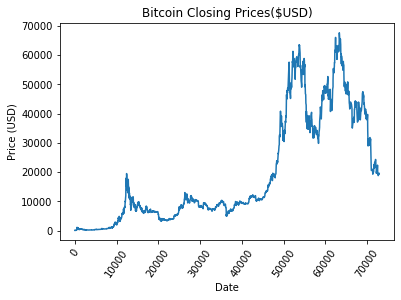

In [97]:
# select data for Bitcoin
df_bitcoin = df[df['crypto_name']=="Bitcoin"]
#df_bitcoin

#plot the time series of Bitcoin closing prices
plt.plot(df_bitcoin['close'])
plt.title("Bitcoin Closing Prices($USD)")
plt.xticks(rotation='55')
plt.xlabel('Date')
plt.ylabel("Price (USD)")
plt.show()

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is availab

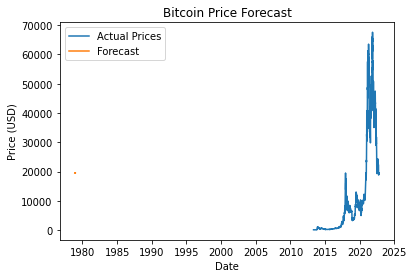

In [79]:
# Fit an ARIMA model to the data
model = ARIMA(df_bitcoin['close'], order=(5,1,0))
results = model.fit()
# Generate a forecast for the next 30 days
forecast = results.forecast(steps=30)

# Plot the forecast
plt.plot(df_bitcoin['close'], label='Actual Prices')
plt.plot(forecast, label='Forecast')
plt.title('Bitcoin Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

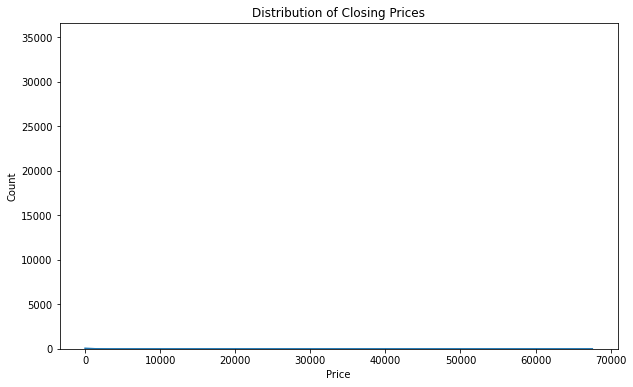

In [111]:
# Visualize the distribution of closing prices
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='close', kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

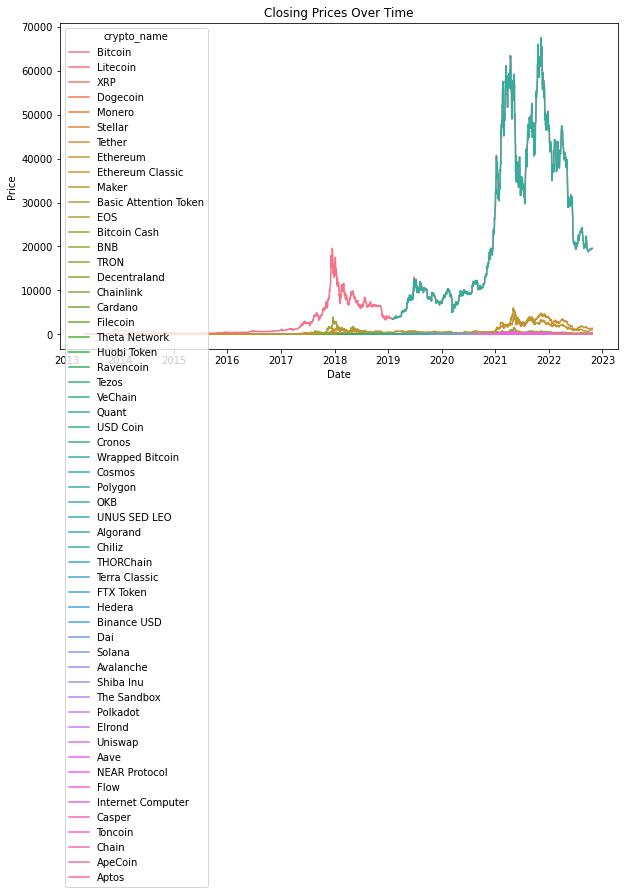

In [112]:
# Visualize the trend of closing prices over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='date', y='close', hue='crypto_name')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


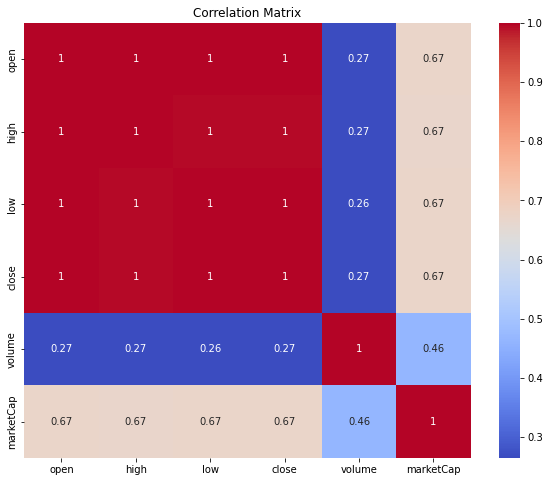

In [113]:
# Calculate and visualize correlations between variables
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 1 How has the market capitalization of different cryptocurrencies changed over time? Which cryptocurrencies have seen the most growth in market capitalization?

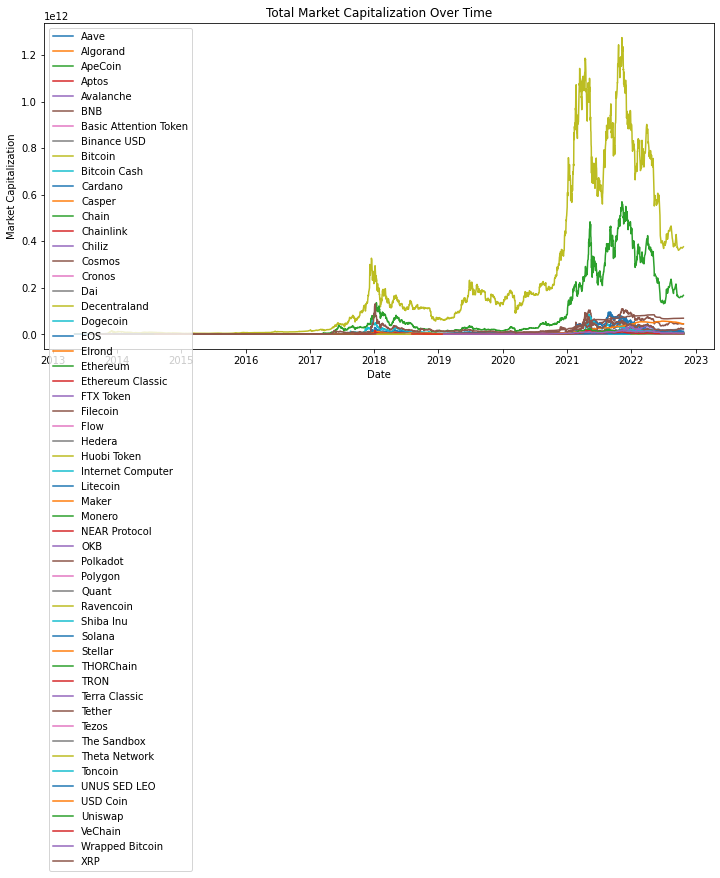

In [114]:
# Group by crypto_name and date to calculate total market cap
market_cap = df.groupby(['crypto_name', 'date'])['marketCap'].sum().reset_index()

# Pivot the table to have crypto_name as columns and date as index
market_cap_pivot = market_cap.pivot(index='date', columns='crypto_name', values='marketCap')

# Visualize market cap trends
plt.figure(figsize=(12, 6))
for column in market_cap_pivot.columns:
    plt.plot(market_cap_pivot[column], label=column)
plt.title('Total Market Capitalization Over Time')
plt.xlabel('Date')
plt.ylabel('Market Capitalization')
plt.legend()
plt.show()

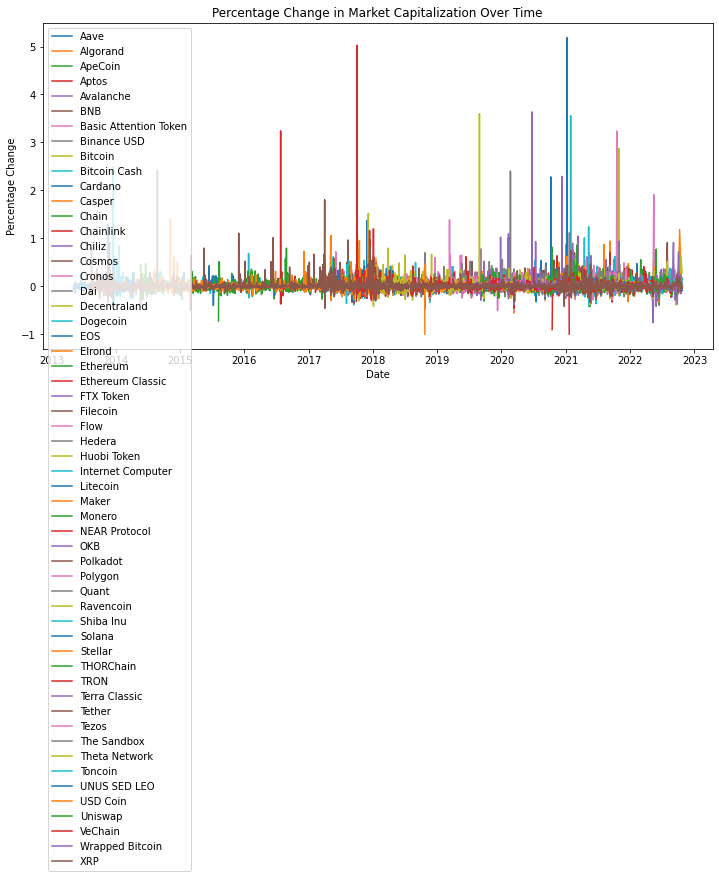

In [115]:
# Calculate percentage change in market cap over time for each cryptocurrency
market_cap_pct_change = market_cap_pivot.pct_change()

# Visualize percentage change in market cap over time
plt.figure(figsize=(12, 6))
for column in market_cap_pct_change.columns:
    plt.plot(market_cap_pct_change[column], label=column)
plt.title('Percentage Change in Market Capitalization Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.show()

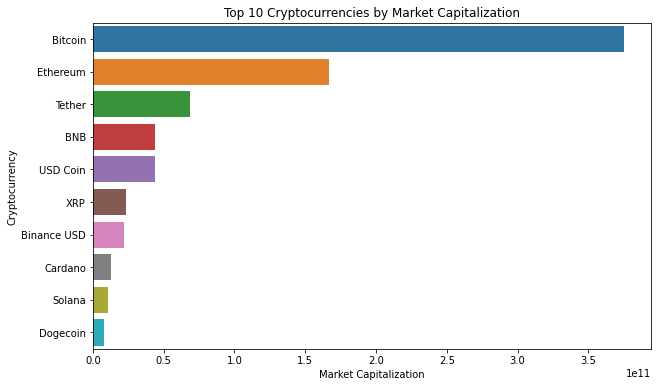

In [116]:
# Calculate total market cap for each cryptocurrency in the latest date available
latest_market_cap = market_cap.loc[market_cap['date'] == market_cap['date'].max()].set_index('crypto_name')['marketCap']

# Sort by market cap in descending order
latest_market_cap = latest_market_cap.sort_values(ascending=False)

# Visualize top 10 cryptocurrencies by market cap
plt.figure(figsize=(10, 6))
sns.barplot(x=latest_market_cap[:10], y=latest_market_cap[:10].index)
plt.title('Top 10 Cryptocurrencies by Market Capitalization')
plt.xlabel('Market Capitalization')
plt.ylabel('Cryptocurrency')
plt.show()

### 2.Are there any correlations between the prices of different cryptocurrencies? Are certain cryptocurrencies positively or negatively correlated with each other?

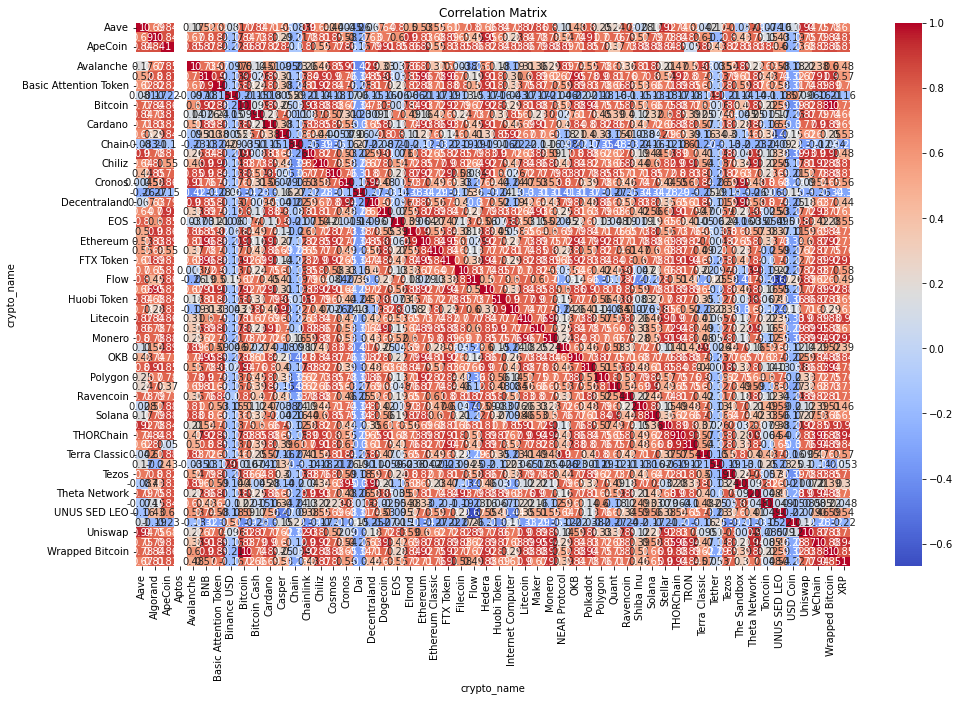

In [118]:
# Calculate correlation matrix
corr_matrix = df.pivot_table(index='date', columns='crypto_name', values='close').corr()

# Visualize correlation matrix
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [119]:
corr_matrix = df.pivot_table(index='date', columns='crypto_name', values='close').corr()
corr_matrix

crypto_name,Aave,Algorand,ApeCoin,Aptos,Avalanche,BNB,Basic Attention Token,Binance USD,Bitcoin,Bitcoin Cash,...,Tezos,The Sandbox,Theta Network,Toncoin,UNUS SED LEO,USD Coin,Uniswap,VeChain,Wrapped Bitcoin,XRP
crypto_name,,,,,,,,,,,,,,,,,,,,,
Aave,1.000000,0.688650,0.836625,NaN,0.165994,0.524811,0.616765,0.080668,0.774453,0.841835,...,0.702445,-0.087357,0.788510,-0.073696,-0.157251,0.102019,0.936142,0.749875,0.776507,0.666119
Algorand,0.688650,1.000000,0.842958,NaN,0.669121,0.802908,0.817945,-0.167206,0.838578,0.728442,...,0.797456,0.430794,0.752113,0.145778,0.433297,-0.190136,0.753257,0.794487,0.837409,0.813927
ApeCoin,0.836625,0.842958,1.000000,NaN,0.851542,0.868052,0.816412,-0.219037,0.859687,0.871859,...,0.822124,0.829279,0.832805,0.839824,0.595976,-0.228122,0.680153,0.830925,0.859617,0.813406
Aptos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avalanche,0.165994,0.669121,0.851542,NaN,1.000000,0.734333,0.667952,-0.096605,0.604481,0.137714,...,0.539835,0.885157,0.218082,0.689521,0.584825,-0.177849,0.220698,0.376984,0.602040,0.484359
BNB,0.524811,0.802908,0.868052,NaN,0.734333,1.000000,0.901445,-0.182155,0.915984,0.026219,...,0.791732,0.611626,0.859135,0.480295,0.741135,-0.321610,0.666713,0.910495,0.904191,0.574484
Basic Attention Token,0.616765,0.817945,0.816412,NaN,0.667952,0.901445,1.000000,-0.152757,0.881044,0.239944,...,0.809289,0.586621,0.874431,0.617522,0.576534,-0.305371,0.743207,0.892338,0.886246,0.701736
Binance USD,0.080668,-0.167206,-0.219037,NaN,-0.096605,-0.182155,-0.152757,1.000000,-0.205764,-0.145806,...,-0.210870,-0.136367,-0.143929,-0.099531,-0.183197,0.570456,0.096357,-0.156863,-0.205848,-0.162868
Bitcoin,0.774453,0.838578,0.859687,NaN,0.604481,0.915984,0.881044,-0.205764,1.000000,0.099057,...,0.857959,0.395405,0.893142,0.222173,0.592009,-0.385576,0.823914,0.880637,0.999962,0.721680


### 3.Do the prices of different cryptocurrencies follow a particular distribution (e.g. normal, log-normal)? Are there any outliers in the data?

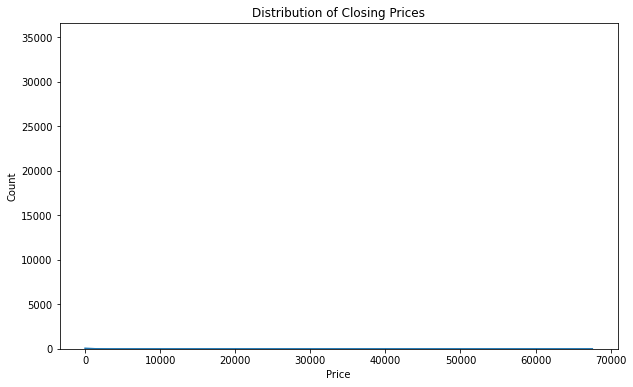

In [120]:
# Visualize distribution of closing prices
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='close', kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


<AxesSubplot:>

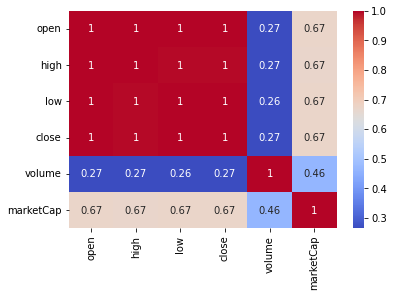

In [121]:
# Create a correlation matrix
corr = df[['open', 'high', 'low', 'close', 'volume', 'marketCap']].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

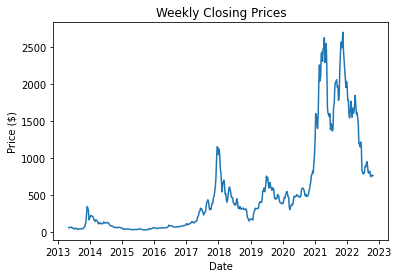

In [122]:
df.set_index('date', inplace=True)

# Resample the data to a weekly frequency and calculate the mean closing price for each week
weekly_close = df['close'].resample('W').mean()

# Plot the time series of weekly closing prices
plt.plot(weekly_close)
plt.title('Weekly Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.show()


In [ ]:
# Create a new column to indicate whether the cryptocurrency was launched through an ICO or not
df['launched_through_ico'] = df['crypto_name'].apply(lambda x: 'ICO' if 'ICO' in x else 'Other')

# Calculate the mean market capitalization for ICO-launched cryptocurrencies and non-ICO-launched cryptocurrencies
ico_market_cap = df[df['launched_through_ico'] == 'ICO']['marketCap'].mean()
other_market_cap = df[df['launched_through_ico'] == 'Other']['marketCap'].mean()

# Calculate the mean trading volume for ICO-launched cryptocurrencies and non-ICO-launched cryptocurrencies
ico_volume = df[df['launched_through_ico'] == 'ICO']['volume'].mean()
other_volume = df[df['launched_through_ico'] == 'Other']['volume'].mean()

# Calculate the mean liquidity for ICO-launched cryptocurrencies and non-ICO-launched cryptocurrencies
ico_liquidity = df[df['launched_through_ico'] == 'ICO']['marketCap'] / df[df['launched_through_ico'] == 'ICO']['volume']
other_liquidity = df[df['launched_through_ico'] == 'Other']['marketCap'] / df[df['launched_through_ico'] == 'Other']['volume']

# Plot the distribution of market capitalization for ICO-launched cryptocurrencies and non-ICO-launched cryptocurrencies
sns.kdeplot(df[df['launched_through_ico'] == 'ICO']['marketCap'], shade=True, label='ICO')
sns.kdeplot(df[df['launched_through_ico'] == 'Other']['marketCap'], shade=True, label='Other')
plt.xlabel('Market Capitalization')
plt.title('Distribution of Market Capitalization by Launch Method')
plt.show()

# Plot the distribution of trading volume for ICO-launched cryptocurrencies and non-ICO-launched cryptocurrencies
sns.kdeplot(df[df['launched_through_ico'] == 'ICO']['volume'], shade=True, label='ICO')
sns.kdeplot(df[df['launched_through_ico'] == 'Other']['volume'], shade=True, label='Other')
plt.xlabel('Trading Volume')
plt.title('Distribution of Trading Volume by Launch Method')
plt.show()

# Plot the distribution of liquidity for ICO-launched cryptocurrencies and non-ICO-launched cryptocurrencies
sns.kdeplot(ico_liquidity, shade=True, label='ICO')
sns.kdeplot(other_liquidity, shade=True, label='Other')
plt.xlabel('Liquidity')
plt.title('Distribution of Liquidity by Launch Method')
plt.show()

# Plot the time series of closing prices for ICO-launched cryptocurrencies and non-ICO-launched cryptocurrencies
plt.plot(df[df['launched_through_ico'] == 'ICO'].groupby('date')['close'].mean(), label='ICO')
plt.plot(df[df['launched_through_ico'] == 'Other'].groupby('date')['close'].mean(), label='Other')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.title('Time Series of Closing Prices by Launch Method')
plt.legend()
plt.show()


In [ ]:
# Create a new column to indicate whether the cryptocurrency was launched through an ICO or not
df['launched_through_ico'] = df['crypto_name'].apply(lambda x: 'ICO' if 'ICO' in x else 'Other')

# Calculate the mean market capitalization for ICO-launched cryptocurrencies and non-ICO-launched cryptocurrencies
ico_market_cap = df[df['launched_through_ico'] == 'ICO']['marketCap'].mean()
other_market_cap = df[df['launched_through_ico'] == 'Other']['marketCap'].mean()

# Calculate the mean trading volume for ICO-launched cryptocurrencies and non-ICO-launched cryptocurrencies
ico_volume = df[df['launched_through_ico'] == 'ICO']['volume'].mean()
other_volume = df[df['launched_through_ico'] == 'Other']['volume'].mean()

# Calculate the mean liquidity for ICO-launched cryptocurrencies and non-ICO-launched cryptocurrencies
ico_liquidity = df[df['launched_through_ico'] == 'ICO']['marketCap'] / df[df['launched_through_ico'] == 'ICO']['volume']
other_liquidity = df[df['launched_through_ico'] == 'Other']['marketCap'] / df[df['launched_through_ico'] == 'Other']['volume']
